# Project 02 - Image Processing

## Student Information

- Full name: Dương Quang Thắng
- Student ID: 22127384
- Class: 22CLC09

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

## Read & Show Image

In [2]:
# Read image 
def read_img(img_path):
    img = Image.open(img_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_2d = np.array(img)
    return img_2d


# Show image 
def show_img(img_2d):
    plt.imshow(img_2d)
    plt.show()

# Adjust Brightness

In [3]:
def adjust_brightness(img_2d, lamda):
    img_2d_bright = np.clip(img_2d * lamda, 0, 255).astype(np.uint8)
    
    return img_2d_bright

# Adjust Contrast

In [4]:
def adjust_contrast(img_2d, lamda):
    mean = np.mean(img_2d, axis=(0, 1), keepdims=True)
    img_2d_contrast = np.clip((img_2d - mean) * lamda + mean, 0, 255).astype(np.uint8)
    return img_2d_contrast

# Flip Image

In [5]:
# Flip image horizontally
def flip_horizontal(img_2d):
    img_2d_flip_h = img_2d[:, ::-1, :]
    return img_2d_flip_h

# Flip image vertically
def flip_vertical(img_2d):
    img_2d_flip_v = img_2d[::-1, :, :]
    return img_2d_flip_v

# Gray Image

In [6]:
def convert_to_grayscale(img_2d):
    red, green, blue = img_2d[:,:,0], img_2d[:,:,1], img_2d[:,:,2]
    gray = 0.299*red + 0.587*green + 0.114*blue
    img_2d[..., 0] = gray
    img_2d[..., 1] = gray
    img_2d[..., 2] = gray
    return img_2d.astype('uint8')

# Sepia Image

In [7]:
def convert_to_sepia(img_2d):
    s_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia_img = img_2d @ s_filter.T
    sepia_img = np.clip(sepia_img, 0, 255).astype(np.uint8)
    return sepia_img

# Blur image

In [8]:
def blur_image(img_2d):
    feature_map = np.ones((3, 3), np.float32) / 9
    img_padding = np.pad(img_2d, ((1, 1), (1, 1), (0, 0)), mode='constant')
    img_blur = np.zeros_like(img_2d)

    for col in range(img_blur.shape[0]):
        for row in range(img_blur.shape[1]):
            img_blur[col, row] = np.sum(feature_map * img_padding[col:col+3, row:row+3], axis=(0, 1))

    return img_blur

# Sharpen image

In [9]:
def sharpen_image(img_2d):
    feature_map = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    img_padding = np.pad(img_2d, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)
    img_sharpen = np.zeros_like(img_2d, dtype=float)

    for channel in range(img_2d.shape[2]):
        for col in range(img_sharpen.shape[0]):
            for row in range(img_sharpen.shape[1]):
                img_sharpen[col, row, channel] = np.sum(feature_map * img_padding[col:col+3, row:row+3, channel])

    return np.clip(img_sharpen, 0, 255).astype(np.uint8)

# Crop image to center

In [10]:
def crop_center(img_2d, height, width):
    img_height, img_width, _ = img_2d.shape
    start_x = (img_width - width) // 2
    start_y = (img_height - height) // 2
    img_2d = img_2d[start_y:start_y+height, start_x:start_x+width]
    
    return img_2d

# Crop circle

In [11]:
def crop_circle(img_2d):
    height, width, _ = img_2d.shape
    radius = min(height, width) // 2
    centroid = (height // 2, width // 2)
    
    y, x = np.ogrid[:height, :width]
    mask = (x - centroid[1])**2 + (y - centroid[0])**2 <= radius**2
    mask = mask.astype(np.uint8) * 255
    
    img_circular = np.copy(img_2d)
    img_circular[mask == 0] = 0

    return img_circular

# Crop elip

In [12]:
def crop_elipses(img_2d):
    img_size = img_2d.shape[0]
    height, width, _ = img_2d.shape
    
    def create_elipses_mask(shape, a, b, center, theta):
        y, x = np.ogrid[:shape[0], :shape[1]]
        x_c, y_c = center

        cos_theta = np.cos(np.radians(theta))
        sin_theta = np.sin(np.radians(theta))

        elipses_mask = (((x - x_c) * cos_theta + (y - y_c) * sin_theta) ** 2 / a ** 2 +
                       ((x - x_c) * sin_theta - (y - y_c) * cos_theta) ** 2 / b ** 2) <= 1
        return elipses_mask
    
    mask_main = create_elipses_mask((height, width), height*200 / 512, width*300 / 512, (width // 2, height // 2), 45)
    mask_sub = create_elipses_mask((height, width), height*200 / 512, width*300 / 512, (width // 2, height // 2), 135)

    mask = mask_main | mask_sub

    result_img = np.copy(img_2d)
    result_img[~mask] = 0

    return result_img

# Save Image

In [13]:
def save_img(img_2d, output_path, new_name):
    ext = '.png'
    new_name = f"{new_name}{ext}"
    img = Image.fromarray(img_2d)
    save_path = os.path.join(output_path, new_name)
    img.save(save_path)

## Main Function

Enter image path :  /kaggle/input/imageprocessing-data/lena.png
Enter output path :  /kaggle/working/


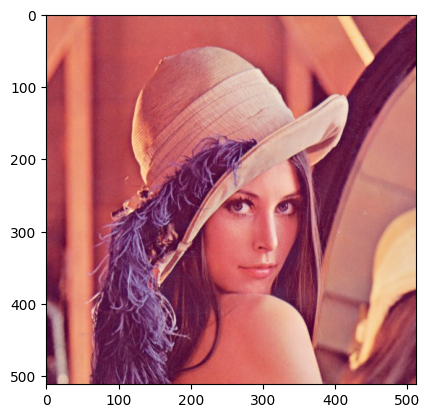

Choose an image processing function:
0: Perform all functions
1: Adjust brightness
2: Adjust contrast
3: Flip image
4: Convert image
5: Blur/Sharpen image
6: Crop image (center)
7: Crop image (circle)
8: Crop image (elip)


Your choice:  8


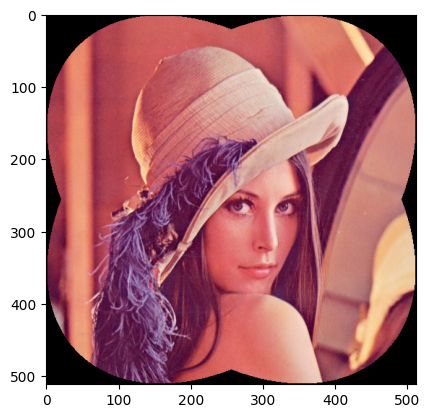

In [18]:
def main():
    img_path = input("Enter image path : ")
    output_dir = input("Enter output path : ")
    os.makedirs(output_dir, exist_ok=True)
    
    # Read image
    img_2d = read_img(img_path)
    
    # Show original image
    show_img(img_2d)
    
    # Menu
    print("Choose an image processing function:")
    print("0: Perform all functions")
    print("1: Adjust brightness")
    print("2: Adjust contrast")
    print("3: Flip image")
    print("4: Convert image")
    print("5: Blur/Sharpen image")
    print("6: Crop image (center)")
    print("7: Crop image (circle)")
    print("8: Crop image (elip)")
    choice = int(input("Your choice: "))
    
    base_name = os.path.splitext(os.path.basename(img_path))[0]

    # Adjust brightness
    if choice == 0 or choice == 1:
        lamda = float(input("Enter brightness factor (e.g., 1.5): "))
        img_2d_bright = adjust_brightness(img_2d, lamda)
        show_img(img_2d_bright)
        new_name = base_name + "_bright"
        save_img(img_2d_bright, output_dir, new_name)
    
    # Adjust contrast
    if choice == 0 or choice == 2:
        alpha = float(input("Enter contrast factor (e.g., 1.5): "))
        img_2d_contrast = adjust_contrast(img_2d, alpha)
        show_img(img_2d_contrast)
        new_name = base_name + "_contrast"
        save_img(img_2d_contrast, output_dir, new_name)
    
    # Flip image
    if choice == 0 or choice == 3:
        img_2d_flip_h = flip_horizontal(img_2d)
        show_img(img_2d_flip_h)
        new_name = base_name + "_flip_h"
        save_img(img_2d_flip_h, output_dir, new_name)

        img_2d_flip_v = flip_vertical(img_2d)
        show_img(img_2d_flip_v)
        new_name = base_name + "_flip_v"
        save_img(img_2d_flip_v, output_dir, new_name)

    # Convert image
    if choice == 0 or choice == 4:
        img_2d_gray = convert_to_grayscale(img_2d)
        show_img(img_2d_gray)
        new_name = base_name + "_gray"
        save_img(img_2d_gray, output_dir, new_name)

        img_2d_sepia = convert_to_sepia(img_2d)
        show_img(img_2d_sepia)
        new_name = base_name + "_sepia"
        save_img(img_2d_sepia, output_dir, new_name)
    
    # Blur/Sharpen image
    if choice == 0 or choice == 5:
        img_2d_blur = blur_image(img_2d)
        show_img(img_2d_blur)
        new_name = base_name + "_blur"
        save_img(img_2d_blur, output_dir, new_name)

        img_2d_sharpen = sharpen_image(img_2d)
        show_img(img_2d_sharpen)
        new_name = base_name + "_sharpen"
        save_img(img_2d_sharpen, output_dir, new_name)
            
    # Crop image (center)
    if choice == 0 or choice == 6:
        width = int(input("Enter the width: "))
        height = int(input("Enter the height: "))
        img_cropped = crop_center(img_2d, width, height)
        show_img(img_cropped)
        new_name = base_name + "_center"
        save_img(img_cropped, output_dir, new_name)
        
    # Crop image (circle)
    if choice == 0 or choice == 7:
        img_circular = crop_circle(img_2d)
        show_img(img_circular)
        new_name = base_name + "_circle"
        save_img(img_circular, output_dir, new_name)
        
    # Crop image (elip)
    if choice == 0 or choice == 8:
        img_ellipses = crop_elipses(img_2d)
        show_img(img_ellipses)
        new_name = base_name + "_elip"
        save_img(img_ellipses, output_dir, new_name)
            

if __name__ == "__main__":
    main()